In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('C:/Users/gokul/Documents/Projects/Online_News_Popularity/OnlineNewsPopularity.csv')
del data['url']

data = data.rename(columns=lambda x: x.strip())

data['log_shares'] = np.log10(data.shares)

data_columns = data.columns
data['weekday_is_monday'] = data['weekday_is_monday'].astype(int)
data['weekday_is_tuesday'] = data['weekday_is_tuesday'].astype(int)
data['weekday_is_wednesday'] = data['weekday_is_wednesday'].astype(int)
data['weekday_is_thursday'] = data['weekday_is_thursday'].astype(int)
data['weekday_is_friday'] = data['weekday_is_friday'].astype(int)
data['weekday_is_saturday'] = data['weekday_is_saturday'].astype(int)
data['weekday_is_sunday'] = data['weekday_is_sunday'].astype(int)

In [184]:
data = pd.read_csv('C:/Users/gokul/Documents/Projects/Online_News_Popularity/OnlineNewsPopularity.csv')

In [185]:
data.head(2)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.35000,-0.600,-0.2,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.11875,-0.125,-0.1,0.0,0.0000,0.5,0.0000,711


In [3]:
#data.shape

In [186]:
type(data)

pandas.core.frame.DataFrame

In [187]:
data.isnull().any() #there is no missing  values

url                               False
 timedelta                        False
 n_tokens_title                   False
 n_tokens_content                 False
 n_unique_tokens                  False
 n_non_stop_words                 False
 n_non_stop_unique_tokens         False
 num_hrefs                        False
 num_self_hrefs                   False
 num_imgs                         False
 num_videos                       False
 average_token_length             False
 num_keywords                     False
 data_channel_is_lifestyle        False
 data_channel_is_entertainment    False
 data_channel_is_bus              False
 data_channel_is_socmed           False
 data_channel_is_tech             False
 data_channel_is_world            False
 kw_min_min                       False
 kw_max_min                       False
 kw_avg_min                       False
 kw_min_max                       False
 kw_max_max                       False
 kw_avg_max                       False


In [188]:
del data['url']

In [189]:
data.head(2)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.35000,-0.600,-0.2,0.5,-0.1875,0.0,0.1875,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.11875,-0.125,-0.1,0.0,0.0000,0.5,0.0000,711


In [190]:
data.shape

(39644, 60)

In [34]:
#data.dtypes
#data.columns
data[data['shares'] > 1000]
## unknown error

In [191]:
data.dtypes

 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       float64
 kw_avg_max                       

In [192]:
data.columns 
#found that extra space is available in all column names 

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

In [193]:
data = data.rename(columns=lambda x: x.strip())

In [194]:
import numpy as np
data['log_shares'] = np.log10(data.shares)

In [195]:
data.head(2)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.7,-0.35000,-0.600,-0.2,0.5,-0.1875,0.0,0.1875,593,2.773055
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.7,-0.11875,-0.125,-0.1,0.0,0.0000,0.5,0.0000,711,2.851870


In [196]:
#data[data['weekday_is_monday'] == 1.0 | data['weekday_is_tuesday']==1.0]

data['weekday_is_monday'] = data['weekday_is_monday'].astype(int)
data['weekday_is_tuesday'] = data['weekday_is_tuesday'].astype(int)
data['weekday_is_wednesday'] = data['weekday_is_wednesday'].astype(int)
data['weekday_is_thursday'] = data['weekday_is_thursday'].astype(int)
data['weekday_is_friday'] = data['weekday_is_friday'].astype(int)
data['weekday_is_saturday'] = data['weekday_is_saturday'].astype(int)
data['weekday_is_sunday'] = data['weekday_is_sunday'].astype(int)
data['is_weekend'] = data['is_weekend'].astype(int)
#data.dtypes

In [197]:
#data[(data['weekday_is_monday'] == 1) or (data['weekday_is_tuesday'] == 1)]
#data[data['weekday_is_monday'or 'weekday_is_tuesday' or 'weekday_is_wednesday' or 'weekday_is_thursday' or 'weekday_is_friday'] ==1].count()

data[data['is_weekend'] ==1].count()
data[data['is_weekend'] ==0].count()

#data.head(2)
print('')

In [198]:
data_pop = data.copy()
data_class = data.copy()
#data_pop[data_pop.columns[0:4]]

In [199]:
data_pop.columns


Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glob

In [200]:
data_pop.drop(data_pop.columns[[0,1,2,3,4,5,6,7,10,11,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,47,48,50,51,53,54,55,56,59]],axis=1,inplace = True)

In [201]:
data_pop.columns

Index(['num_imgs', 'num_videos', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'is_weekend', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'log_shares'],
      dtype='object')

In [202]:
data_pop['num_imgs'] = data['num_imgs'].astype(int)
data_pop['num_videos'] = data['num_videos'].astype(int)
data_pop['data_channel_is_lifestyle'] = data['data_channel_is_lifestyle'].astype(int)
data_pop['data_channel_is_entertainment'] = data['data_channel_is_entertainment'].astype(int)
data_pop['data_channel_is_bus'] = data['data_channel_is_bus'].astype(int)
data_pop['data_channel_is_socmed'] = data['data_channel_is_socmed'].astype(int)
data_pop['data_channel_is_tech'] = data['data_channel_is_tech'].astype(int)
data_pop['data_channel_is_world'] = data['data_channel_is_world'].astype(int)
data_pop['is_weekend'] = data['is_weekend'].astype(int)


In [203]:
data_pop.dtypes

num_imgs                           int32
num_videos                         int32
data_channel_is_lifestyle          int32
data_channel_is_entertainment      int32
data_channel_is_bus                int32
data_channel_is_socmed             int32
data_channel_is_tech               int32
data_channel_is_world              int32
is_weekend                         int32
global_subjectivity              float64
global_sentiment_polarity        float64
global_rate_positive_words       float64
global_rate_negative_words       float64
avg_positive_polarity            float64
avg_negative_polarity            float64
abs_title_subjectivity           float64
abs_title_sentiment_polarity     float64
log_shares                       float64
dtype: object

In [204]:
 #data_pop.head()
data_pop.describe()

,num_imgs,num_videos,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,is_weekend,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,avg_negative_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,log_shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,4.544143,1.249874,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,0.130915,0.443370,0.119309,0.039625,0.016612,0.353825,-0.259524,0.341843,0.156064,3.246288
std,8.309434,4.107855,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,0.337312,0.116685,0.096931,0.017429,0.010828,0.104542,0.127726,0.188791,0.226294,0.404105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.396167,0.057757,0.028384,0.009615,0.306244,-0.328383,0.166667,0.000000,2.975891
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.453457,0.119117,0.039023,0.015337,0.358755,-0.253333,0.500000,0.000000,3.146128
75%,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.508333,0.177832,0.050279,0.021739,0.411428,-0.186905,0.500000,0.250000,3.447158
max,128.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.727841,0.155488,0.184932,1.000000,0.000000,0.500000,1.000000,5.925982


In [205]:
data_pop.head(2)

,num_imgs,num_videos,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,is_weekend,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,avg_negative_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,log_shares
0,1,0,0,1,0,0,0,0,0,0.521617,0.092562,0.045662,0.013699,0.378636,-0.35000,0.0,0.1875,2.773055
1,1,0,0,0,1,0,0,0,0,0.341246,0.148948,0.043137,0.015686,0.286915,-0.11875,0.5,0.0000,2.851870


In [206]:
data_weekend = data_pop[data_pop['is_weekend']==1].copy()
data_weekday = data_pop[data_pop['is_weekend']==0].copy()
weekend_news_count = data_weekend.count()
weekday_news_count = data_weekday.count()

In [207]:
weekday_sum = (data_weekday.sum(axis=0)/weekday_news_count)
weekend_sum = (data_weekend.sum(axis=0)/weekend_news_count)
#type(xx)
#data_weekday.columns
department_values = ['num_imgs', 'num_videos', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'is_weekend', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'log_shares']


In [208]:
column_names = ('department','weekday','weekend')
summary_df = pd.DataFrame(columns=column_names)

In [209]:
weekday_list = weekday_sum.tolist()
weekend_list = weekend_sum.tolist()
summary_df['weekday'] = weekday_list
summary_df['weekend'] = weekend_list
summary_df['department'] = department_values


In [210]:
#updated the decimal values into percentage as part of normalization for graph view 

summary_df.loc[summary_df['department']== 'data_channel_is_lifestyle',['weekday','weekend']] =  summary_df.loc[summary_df['department']== 'data_channel_is_lifestyle',['weekday','weekend']]*100
summary_df.loc[summary_df['department']== 'data_channel_is_entertainment',['weekday','weekend']] =  summary_df.loc[summary_df['department']== 'data_channel_is_entertainment',['weekday','weekend']]*100
summary_df.loc[summary_df['department']== 'data_channel_is_bus',['weekday','weekend']] =  summary_df.loc[summary_df['department']== 'data_channel_is_bus',['weekday','weekend']]*100
summary_df.loc[summary_df['department']== 'data_channel_is_socmed',['weekday','weekend']] =  summary_df.loc[summary_df['department']== 'data_channel_is_socmed',['weekday','weekend']]*100
summary_df.loc[summary_df['department']== 'data_channel_is_tech',['weekday','weekend']] =  summary_df.loc[summary_df['department']== 'data_channel_is_tech',['weekday','weekend']]*100
summary_df.loc[summary_df['department']== 'data_channel_is_world',['weekday','weekend']] =  summary_df.loc[summary_df['department']== 'data_channel_is_world',['weekday','weekend']]*100
summary_df.loc[summary_df['department']== 'global_subjectivity',['weekday','weekend']] =  summary_df.loc[summary_df['department']== 'global_subjectivity',['weekday','weekend']]*100
summary_df.loc[summary_df['department']== 'global_sentiment_polarity',['weekday','weekend']] =  summary_df.loc[summary_df['department']== 'global_sentiment_polarity',['weekday','weekend']]*100
summary_df.loc[summary_df['department']== 'global_rate_positive_words',['weekday','weekend']] =  summary_df.loc[summary_df['department']== 'global_rate_positive_words',['weekday','weekend']]*100
summary_df.loc[summary_df['department']== 'global_rate_negative_words',['weekday','weekend']] =  summary_df.loc[summary_df['department']== 'global_rate_negative_words',['weekday','weekend']]*100
summary_df.loc[summary_df['department']== 'avg_positive_polarity',['weekday','weekend']] =  summary_df.loc[summary_df['department']== 'avg_positive_polarity',['weekday','weekend']]*100
summary_df.loc[summary_df['department']== 'avg_negative_polarity',['weekday','weekend']] =  summary_df.loc[summary_df['department']== 'avg_negative_polarity',['weekday','weekend']]*(-100)
summary_df.loc[summary_df['department']== 'abs_title_subjectivity',['weekday','weekend']] =  summary_df.loc[summary_df['department']== 'abs_title_subjectivity',['weekday','weekend']]*100
summary_df.loc[summary_df['department']== 'abs_title_sentiment_polarity',['weekday','weekend']] =  summary_df.loc[summary_df['department']== 'abs_title_sentiment_polarity',['weekday','weekend']]*100
#summary_df.loc[summary_df['department']== 'log_shares',['weekday','weekend']] =  summary_df.loc[summary_df['department']== 'log_shares',['weekday','weekend']]*100

In [212]:
#summary_df.drop(['is_weekend'],axis =0)
summary_df = summary_df.drop(8)
#summary_df.to_excel('./output.xlsx')
summary_df


,department,weekday,weekend
0,num_imgs,4.372439,5.684008
1,num_videos,1.275469,1.079961
2,data_channel_is_lifestyle,4.954432,7.552987
3,data_channel_is_entertainment,17.823765,17.649326
4,data_channel_is_bus,16.462530,11.290944
5,data_channel_is_socmed,5.822256,6.107900
6,data_channel_is_tech,18.648052,17.745665
7,data_channel_is_world,21.306670,20.924855
9,global_subjectivity,44.245823,44.942433
10,global_sentiment_polarity,11.848423,12.478635


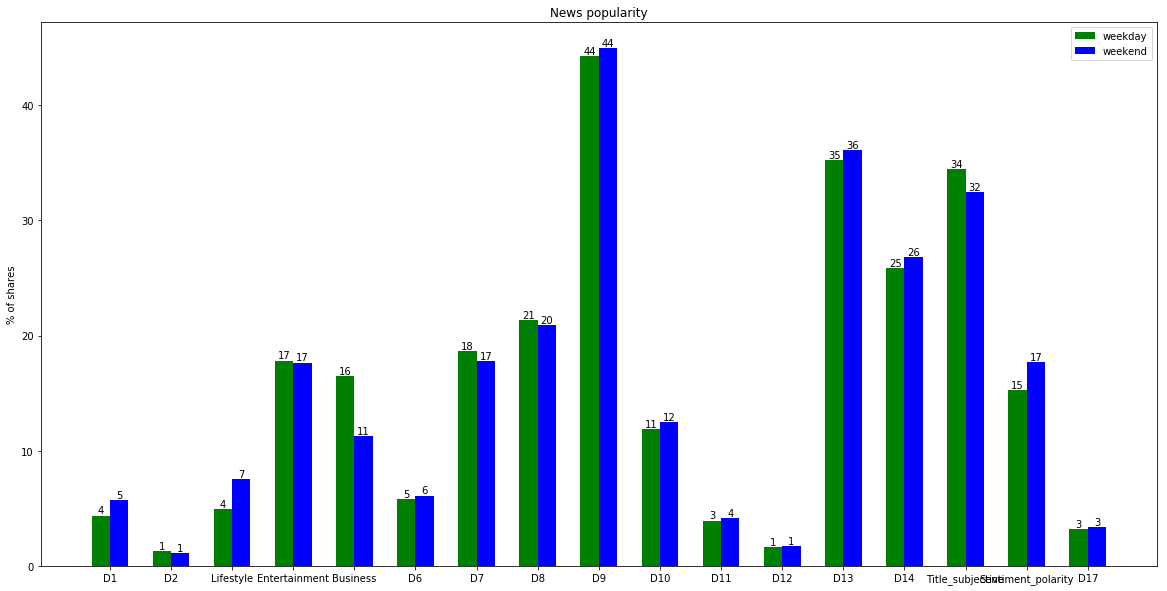

In [213]:
import numpy as np
import matplotlib.pyplot as plt

N = 17
weekday = summary_df['weekday'].values

ind = np.arange(N)  # the x locations for the groups
width = 0.30      # the width of the bars

fig, ax = plt.subplots(figsize =(20,10))
rects1 = ax.bar(ind, weekday, width, color='g')

weekend = summary_df['weekend'].values
rects2 = ax.bar(ind + width, weekend, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('% of shares')
ax.set_title('News popularity')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('D1', 'D2', 'Lifestyle', 'Entertainment', 'Business','D6','D7','D8','D9','D10','D11','D12','D13','D14','Title_subjective','Sentiment_polarity','D17'))

ax.legend((rects1[0], rects2[0]), ('weekday', 'weekend'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [214]:
data_class.columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glob

In [215]:
data_class.drop(data_class.columns[[0,1,2,3,4,5,6,7,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,37,38,39,40,41,42,50,51,53,53,55,56]],axis=1,inplace = True)

In [216]:
data_class.describe()

,num_imgs,num_videos,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,global_subjectivity,...,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,avg_negative_polarity,max_negative_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,4.544143,1.249874,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.443370,...,0.016612,0.682150,0.287934,0.353825,-0.259524,-0.107500,0.341843,0.156064,3395.380184,3.246288
std,8.309434,4.107855,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.116685,...,0.010828,0.190206,0.156156,0.104542,0.127726,0.095373,0.188791,0.226294,11626.950749,0.404105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.396167,...,0.009615,0.600000,0.185185,0.306244,-0.328383,-0.125000,0.166667,0.000000,946.000000,2.975891
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.453457,...,0.015337,0.710526,0.280000,0.358755,-0.253333,-0.100000,0.500000,0.000000,1400.000000,3.146128
75%,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.508333,...,0.021739,0.800000,0.384615,0.411428,-0.186905,-0.050000,0.500000,0.250000,2800.000000,3.447158
max,128.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.184932,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000,1.000000,843300.000000,5.925982


In [217]:
#data_class['share_level'] = (data_class['log_shares']<=2.5)*1
#data_class['share_level'] = (data_class['log_shares']>=4.5)*1
#data_class['share_level'] = ((data_class['log_shares']>3.1) & (data_class['log_shares']<4.5))*1
#data_class['share_level'] = ((data_class['log_shares']>2.5) & (data_class['log_shares']<=3.1))*1

data_class['share_rank'] = (data_class['log_shares']<=2.5)*1 | ((data_class['log_shares']>2.5) & (data_class['log_shares']<=3.2))*2 | ((data_class['log_shares']>3.2) & (data_class['log_shares']<4.5))*3 |(data_class['log_shares']>=4.5)*4

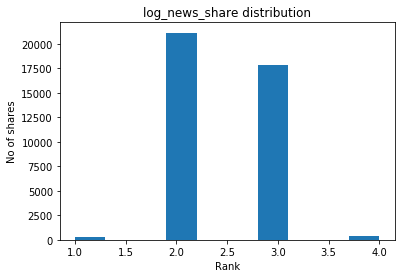

In [218]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.hist(data_class['share_rank'])
plt.xlabel('Rank')
plt.ylabel('No of shares')
plt.title('log_news_share distribution')
plt.show()

In [219]:
y = data_class[['share_rank']].copy()
type(y)

pandas.core.frame.DataFrame

In [220]:
data_class.columns
influence_features = ['num_imgs', 'num_videos', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'avg_negative_polarity', 'max_negative_polarity',
       'abs_title_subjectivity', 'abs_title_sentiment_polarity']

In [221]:
X = data_class[influence_features].copy()
type(X)

pandas.core.frame.DataFrame

In [222]:
X.columns

Index(['num_imgs', 'num_videos', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'avg_negative_polarity',
       'max_negative_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [223]:
y.columns

Index(['share_rank'], dtype='object')

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=324)

In [225]:
rank_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
rank_classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [226]:
type(rank_classifier)

sklearn.tree.tree.DecisionTreeClassifier

In [227]:
Predictions = rank_classifier.predict(X_test)

In [228]:
Predictions[:10]

array([2, 3, 2, 3, 2, 3, 2, 2, 2, 3])

In [229]:
y_test['share_rank'][:10]

35205    3
15882    3
23584    2
25354    2
25593    2
22305    3
27533    3
36710    2
12978    2
13322    2
Name: share_rank, dtype: int32

In [230]:
accuracy_score(y_true = y_test, y_pred = Predictions)

0.59167717528373265